# Importing dataset

In [31]:
import numpy as np
import pandas as pd
import seaborn as sb
sb.set()
from sklearn import metrics
import missingno as msn
%matplotlib inline
import matplotlib.pyplot as plt
reg_data = pd.read_excel('WHR2018Chapter2OnlineData.xls',sheet_name = 'SupportingFactors')
data = pd.read_excel('WHR2018Chapter2OnlineData.xls',sheet_name = 'Table2.1')
region = pd.DataFrame(reg_data[["country","Region indicator"]])  # extracting region information from supporting factors sheet

data_M = data.merge(region, on='country', how='left')         # inserting a column of region corresponding to countries to the dataset
col = list(data_M)
col.insert(1,col.pop(col.index('Region indicator')))
data_M = data_M.loc[:,col]
data_M.head(100)    # merged data

country                    Region indicator  year  Life Ladder  \
0   Afghanistan                          South Asia  2008     3.723590   
1   Afghanistan                          South Asia  2009     4.401778   
2   Afghanistan                          South Asia  2010     4.758381   
3   Afghanistan                          South Asia  2011     3.831719   
4   Afghanistan                          South Asia  2012     3.782938   
5   Afghanistan                          South Asia  2013     3.572100   
6   Afghanistan                          South Asia  2014     3.130896   
7   Afghanistan                          South Asia  2015     3.982855   
8   Afghanistan                          South Asia  2016     4.220169   
9   Afghanistan                          South Asia  2017     2.661718   
10      Albania          Central and Eastern Europe  2007     4.634252   
11      Albania          Central and Eastern Europe  2009     5.485470   
12      Albania          Central and Eastern Europe  2010     5.268937   
13      Albania          Central and Eastern Europe  2011     5.867422   
14      Albania          Central and Eastern Europe  2012     5.510124   
15      Albania          Central and Eastern Europe  2013     4.550648   
16      Albania          Central and Eastern Europe  2014     4.813763   
17      Albania          Central and Eastern Europe  2015     4.606651   
18      Albania          Central and Eastern Europe  2016     4.511101   
19      Albania          Central and Eastern Europe  2017     4.639548   
20      Algeria        Middle East and North Africa  2010     5.463567   
21      Algeria        Middle East and North Africa  2011     5.317194   
22      Algeria        Middle East and North Africa  2012     5.604596   
23      Algeria        Middle East and North Africa  2014     6.354898   
24      Algeria        Middle East and North Africa  2016     5.340854   
25      Algeria        Middle East and North Africa  2017     5.248912   
26       Angola                  Sub-Saharan Africa  2011     5.589001   
27       Angola                  Sub-Saharan Africa  2012     4.360250   
28       Angola                  Sub-Saharan Africa  2013     3.937107   
29       Angola                  Sub-Saharan Africa  2014     3.794838   
..          ...                                 ...   ...          ...   
70      Austria                      Western Europe  2013     7.498803   
71      Austria                      Western Europe  2014     6.950000   
72      Austria                      Western Europe  2015     7.076447   
73      Austria                      Western Europe  2016     7.048072   
74      Austria                      Western Europe  2017     7.293728   
75   Azerbaijan  Commonwealth of Independent States  2006     4.727871   
76   Azerbaijan  Commonwealth of Independent States  2007     4.568160   
77   Azerbaijan  Commonwealth of Independent States  2008     4.817189   
78   Azerbaijan  Commonwealth of Independent States  2009     4.573725   
79   Azerbaijan  Commonwealth of Independent States  2010     4.218611   
80   Azerbaijan  Commonwealth of Independent States  2011     4.680470   
81   Azerbaijan  Commonwealth of Independent States  2012     4.910772   
82   Azerbaijan  Commonwealth of Independent States  2013     5.481178   
83   Azerbaijan  Commonwealth of Independent States  2014     5.251530   
84   Azerbaijan  Commonwealth of Independent States  2015     5.146775   
85   Azerbaijan  Commonwealth of Independent States  2016     5.303895   
86   Azerbaijan  Commonwealth of Independent States  2017     5.152279   
87      Bahrain        Middle East and North Africa  2009     5.700523   
88      Bahrain        Middle East and North Africa  2010     5.936869   
89      Bahrain        Middle East and North Africa  2011     4.823976   
90      Bahrain        Middle East and North Africa  2012     5.027187   
91      Bahrain        Middle East and North Africa  2013     6.689711   
92      Bahr

In [3]:
data_M['Region indicator'].fillna("None", inplace=True)
print("number of regions:",len(data_M['Region indicator'].unique())-1)    # len()-1 because "none" is not a region
data_M['Region indicator'].value_counts()    # information about the regions

number of regions: 10


Sub-Saharan Africa                    327
Latin America and Caribbean           236
Western Europe                        211
Middle East and North Africa          181
Central and Eastern Europe            176
Commonwealth of Independent States    139
Southeast Asia                         93
South Asia                             72
East Asia                              65
North America and ANZ                  45
None                                   17
Name: Region indicator, dtype: int64

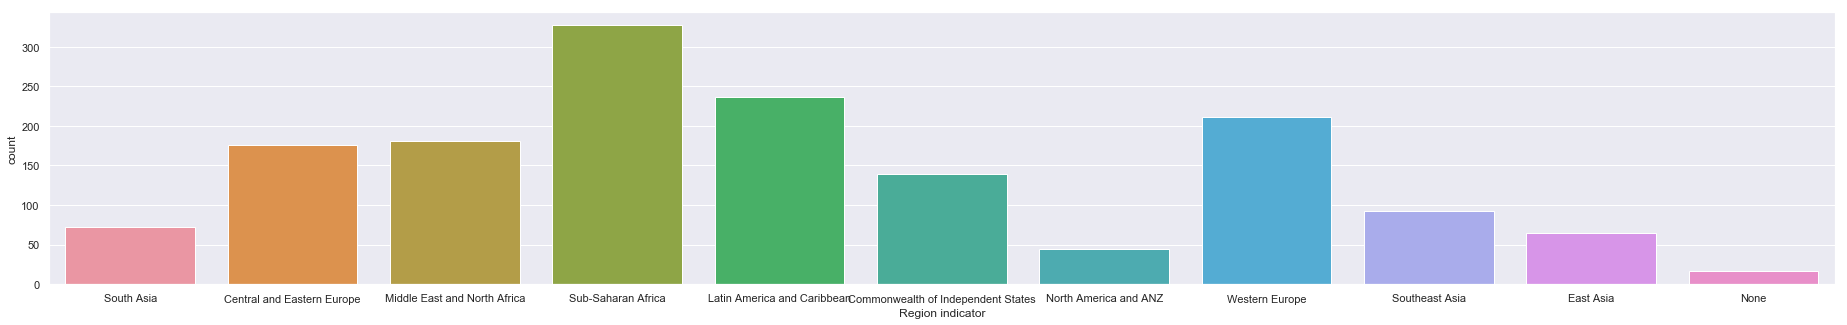

In [4]:
f, axes = plt.subplots(1, 1, figsize=(32, 5))
sb.countplot(data_M["Region indicator"])

# Visualisation of missing data

In [5]:
data_M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1562 entries, 0 to 1561
Data columns (total 20 columns):
country                                                     1562 non-null object
Region indicator                                            1562 non-null object
year                                                        1562 non-null int64
Life Ladder                                                 1562 non-null float64
Log GDP per capita                                          1535 non-null float64
Social support                                              1549 non-null float64
Healthy life expectancy at birth                            1553 non-null float64
Freedom to make life choices                                1533 non-null float64
Generosity                                                  1482 non-null float64
Perceptions of corruption                                   1472 non-null float64
Positive affect                                             1544 non-null flo

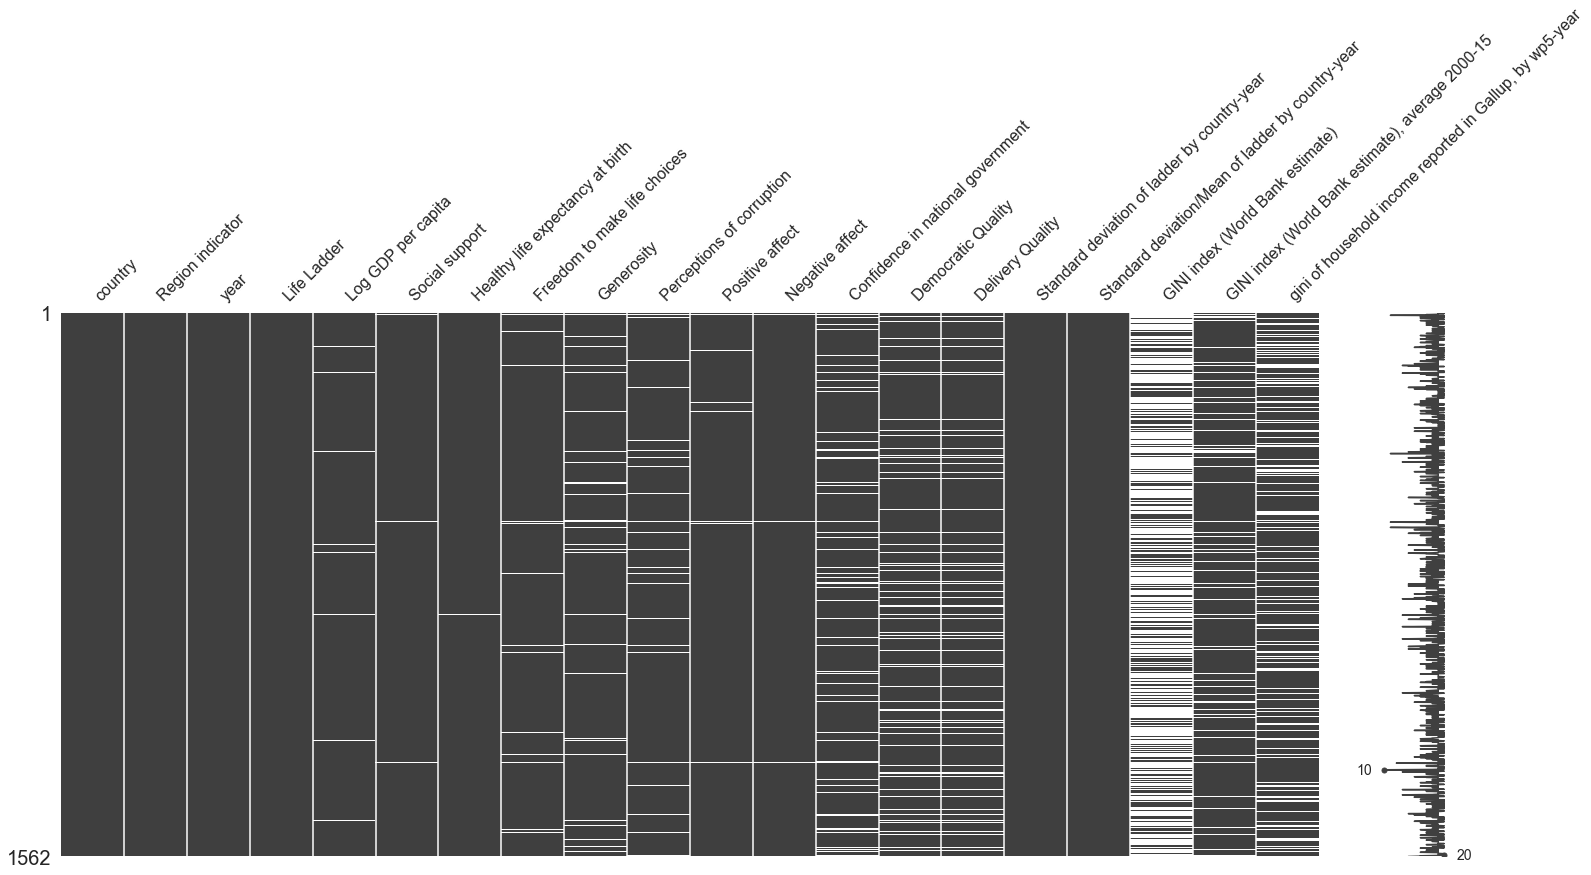

In [6]:
msn.matrix(data_M.sample(1562))   # visualise the locations where the values are missing

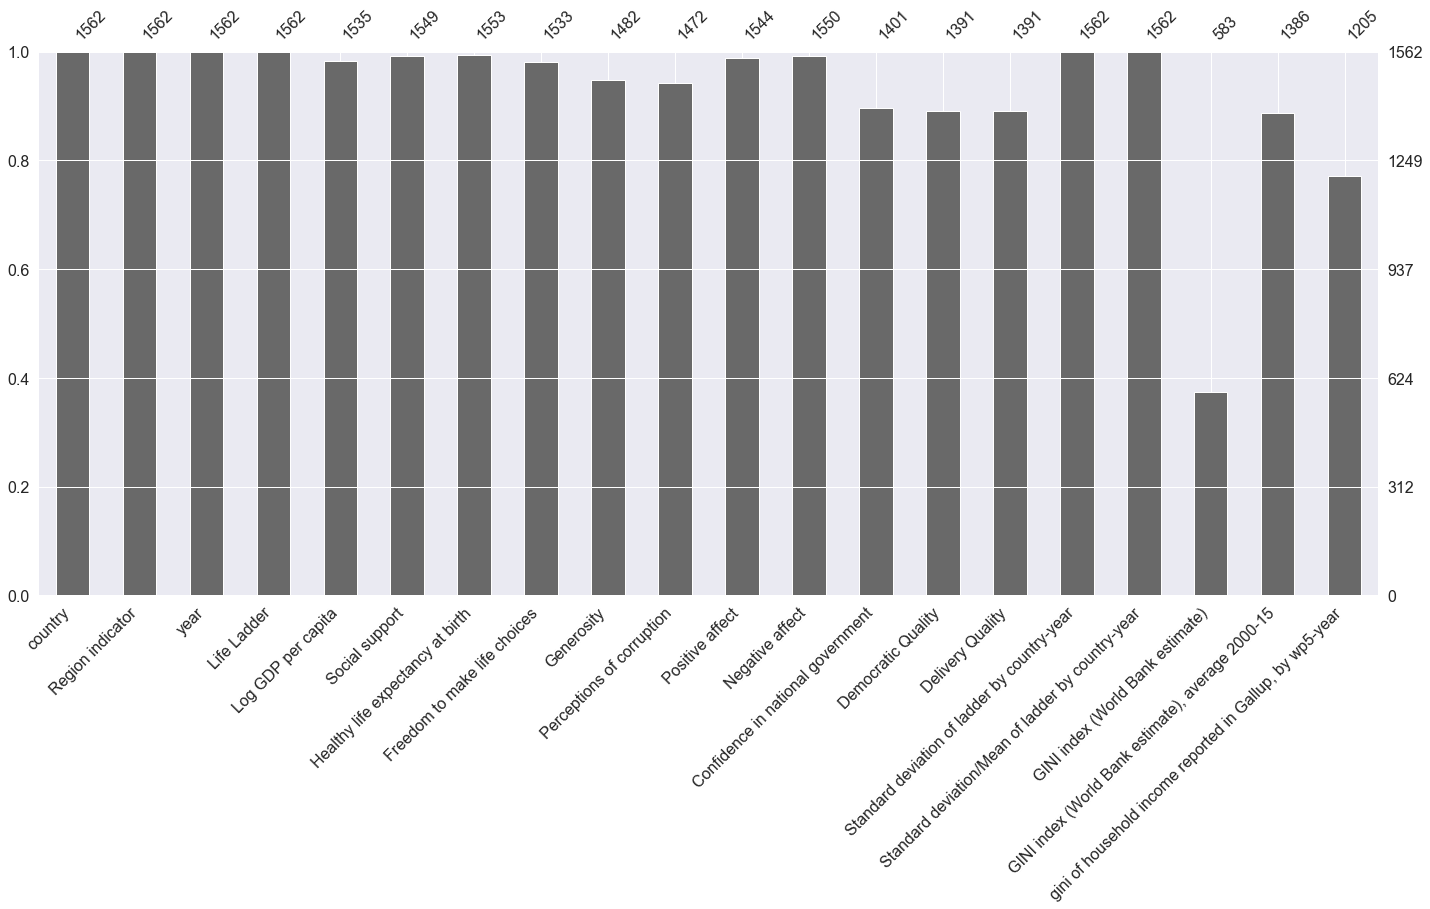

In [7]:
msn.bar(data_M.sample(1562))    # counting the data points present for each variable in the dataset

# Filling in the missing data

In [8]:
import scipy as sp

In [9]:
data_pred = data_M.interpolate(method = 'linear')    # use scipy.interpolation to fill in the missing data values
data_pred.head(1562)

country              Region indicator  year  Life Ladder  \
0     Afghanistan                    South Asia  2008     3.723590   
1     Afghanistan                    South Asia  2009     4.401778   
2     Afghanistan                    South Asia  2010     4.758381   
3     Afghanistan                    South Asia  2011     3.831719   
4     Afghanistan                    South Asia  2012     3.782938   
5     Afghanistan                    South Asia  2013     3.572100   
6     Afghanistan                    South Asia  2014     3.130896   
7     Afghanistan                    South Asia  2015     3.982855   
8     Afghanistan                    South Asia  2016     4.220169   
9     Afghanistan                    South Asia  2017     2.661718   
10        Albania    Central and Eastern Europe  2007     4.634252   
11        Albania    Central and Eastern Europe  2009     5.485470   
12        Albania    Central and Eastern Europe  2010     5.268937   
13        Albania    Central and Eastern Europe  2011     5.867422   
14        Albania    Central and Eastern Europe  2012     5.510124   
15        Albania    Central and Eastern Europe  2013     4.550648   
16        Albania    Central and Eastern Europe  2014     4.813763   
17        Albania    Central and Eastern Europe  2015     4.606651   
18        Albania    Central and Eastern Europe  2016     4.511101   
19        Albania    Central and Eastern Europe  2017     4.639548   
20        Algeria  Middle East and North Africa  2010     5.463567   
21        Algeria  Middle East and North Africa  2011     5.317194   
22        Algeria  Middle East and North Africa  2012     5.604596   
23        Algeria  Middle East and North Africa  2014     6.354898   
24        Algeria  Middle East and North Africa  2016     5.340854   
25        Algeria  Middle East and North Africa  2017     5.248912   
26         Angola            Sub-Saharan Africa  2011     5.589001   
27         Angola            Sub-Saharan Africa  2012     4.360250   
28         Angola            Sub-Saharan Africa  2013     3.937107   
29         Angola            Sub-Saharan Africa  2014     3.794838   
...           ...                           ...   ...          ...   
1532        Yemen  Middle East and North Africa  2011     3.746256   
1533        Yemen  Middle East and North Africa  2012     4.060601   
1534        Yemen  Middle East and North Africa  2013     4.217679   
1535        Yemen  Middle East and North Africa  2014     3.967958   
1536        Yemen  Middle East and North Africa  2015     2.982674   
1537        Yemen  Middle East and North Africa  2016     3.825631   
1538        Yemen  Middle East and North Africa  2017     3.253560   
1539       Zambia            Sub-Saharan Africa  2006     4.824455   
1540       Zambia            Sub-Saharan Africa  2007     3.998293   
1541       Zambia            Sub-Saharan Africa  2008     4.730263   
1542       Zambia            Sub-Saharan Africa  2009     5.260361   
1543       Zambia            Sub-Saharan Africa  2011     4.999114   
1544       Zambia            Sub-Saharan Africa  2012     5.013375   
1545       Zambia            Sub-Saharan Africa  2013     5.243996   
1546       Zambia            Sub-Saharan Africa  2014     4.345837   
1547       Zambia            Sub-Saharan Africa  2015     4.843164   
1548       Zambia            Sub-Saharan Africa  2016     4.347544   
1549       Zambia            Sub-Saharan Africa  2017     3.932777   
1550     Zimbabwe            Sub-Saharan Africa  2006     3.826268   
1551     Zimbabwe            Sub-Saharan Africa  2007     3.280247   
1552     Zimbabwe            Sub-Saharan Africa  2008     3.174264   
1553     Zimbabwe            Sub-Saharan Africa  2009     4.055914   
1554     Zimbabwe            Sub-Saharan Africa  2010     4.681570   
1555     Zimbabwe            Sub-Saharan Africa  2011     4.845642   
1556     Zimbabwe            Sub-Saharan Africa  2012     4.955101   
1557     Zimbabwe   

In [10]:
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1562 entries, 0 to 1561
Data columns (total 20 columns):
country                                                     1562 non-null object
Region indicator                                            1562 non-null object
year                                                        1562 non-null int64
Life Ladder                                                 1562 non-null float64
Log GDP per capita                                          1562 non-null float64
Social support                                              1562 non-null float64
Healthy life expectancy at birth                            1562 non-null float64
Freedom to make life choices                                1562 non-null float64
Generosity                                                  1562 non-null float64
Perceptions of corruption                                   1562 non-null float64
Positive affect                                             1562 non-null flo

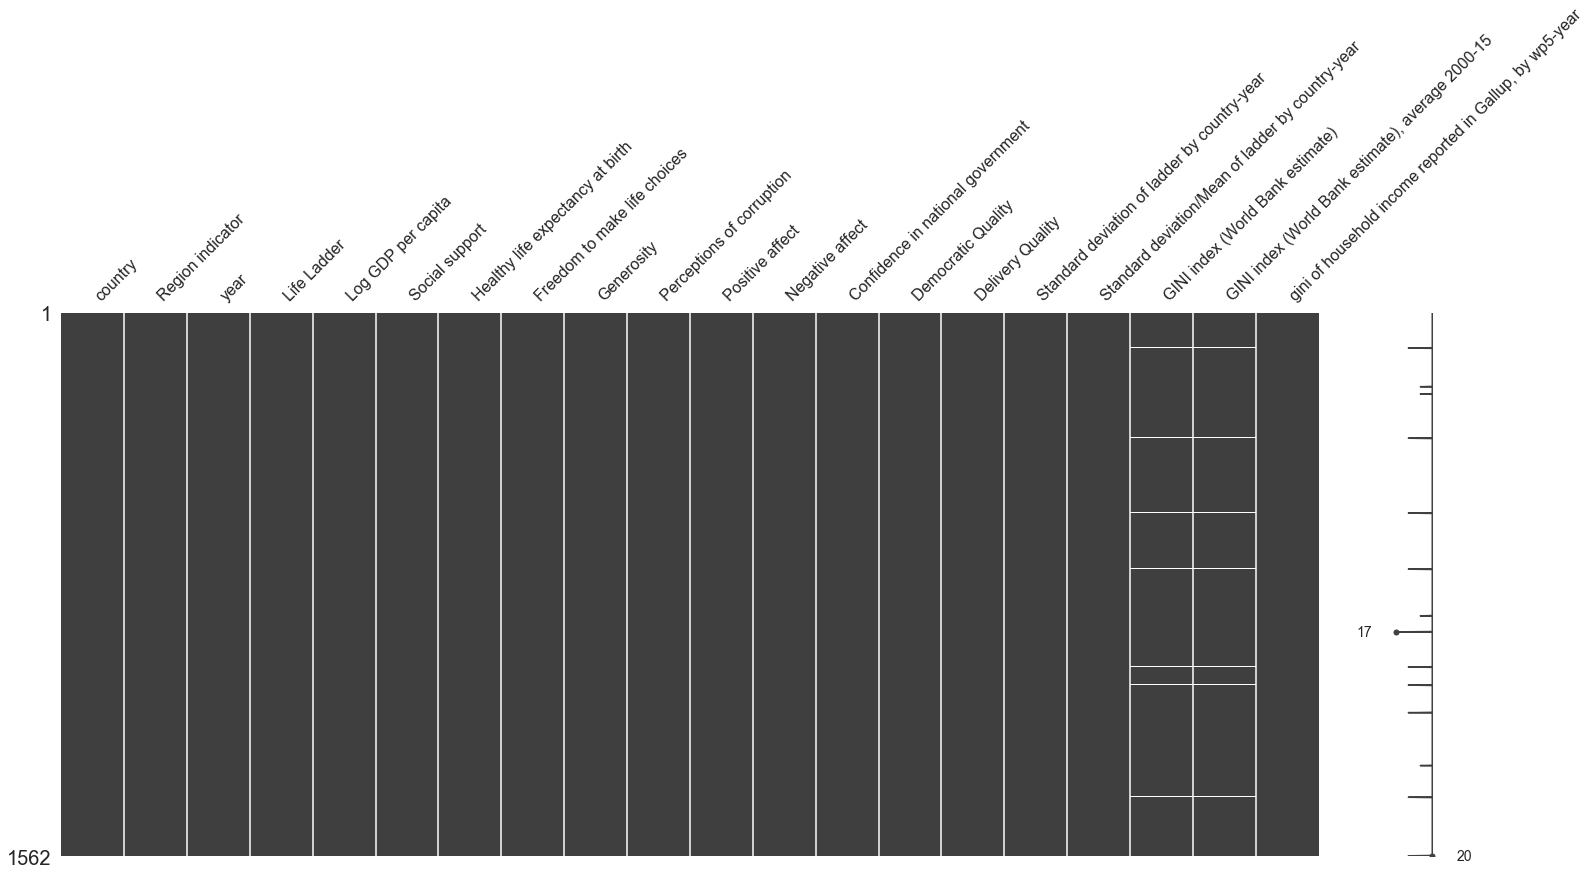

In [11]:
msn.matrix(data_pred.sample(1562))    # some data points are still missing beacause extrapolation was not done and those points lie outside the range of given data

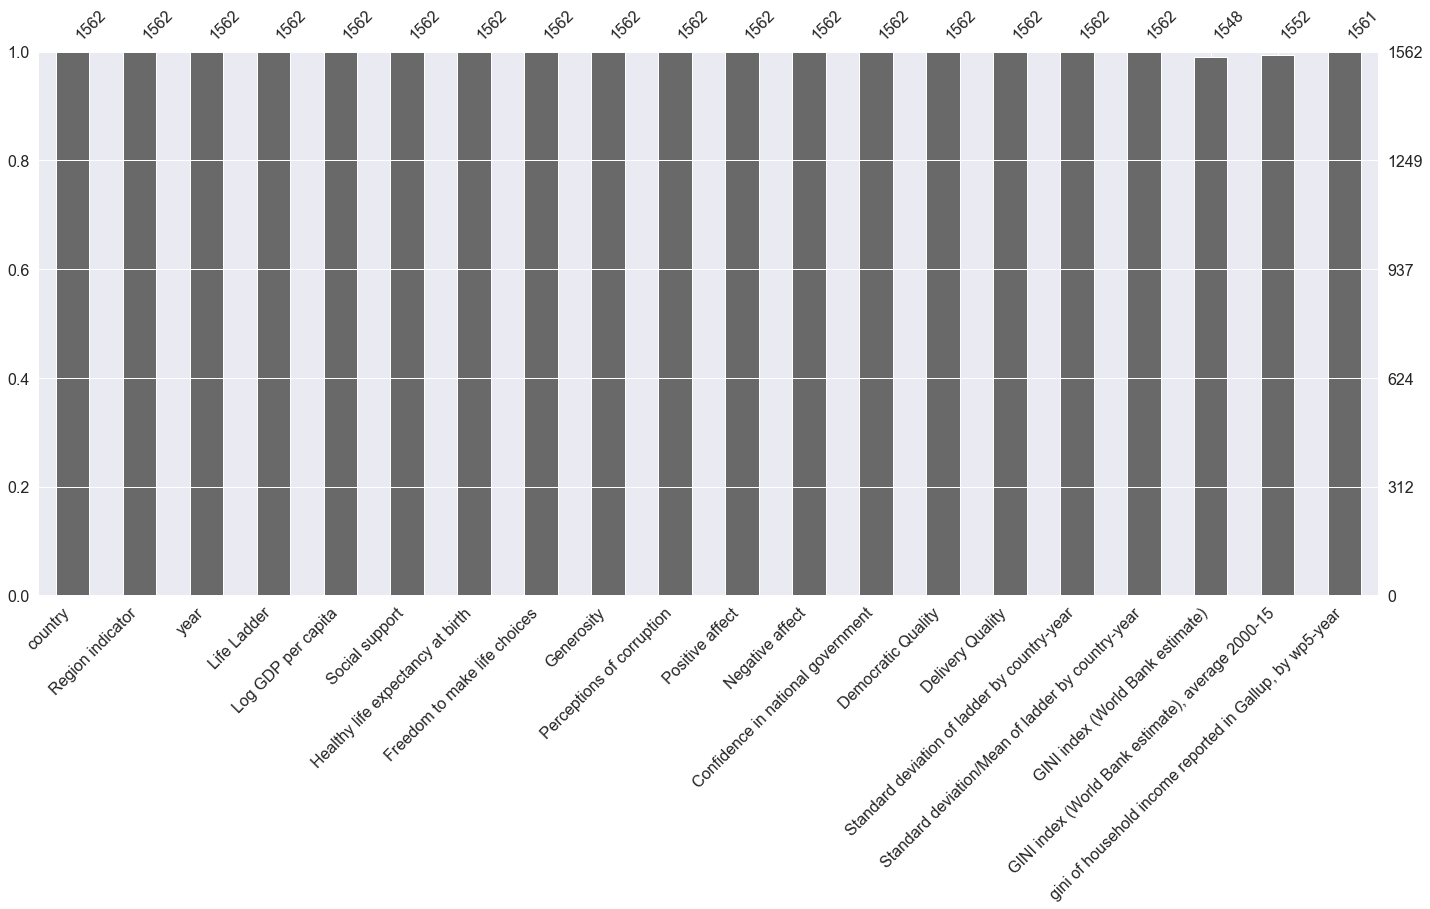

In [12]:
msn.bar(data_pred.sample(1562))

# Visualisation of filled-in data

E:\anaconda\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
E:\anaconda\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
E:\anaconda\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


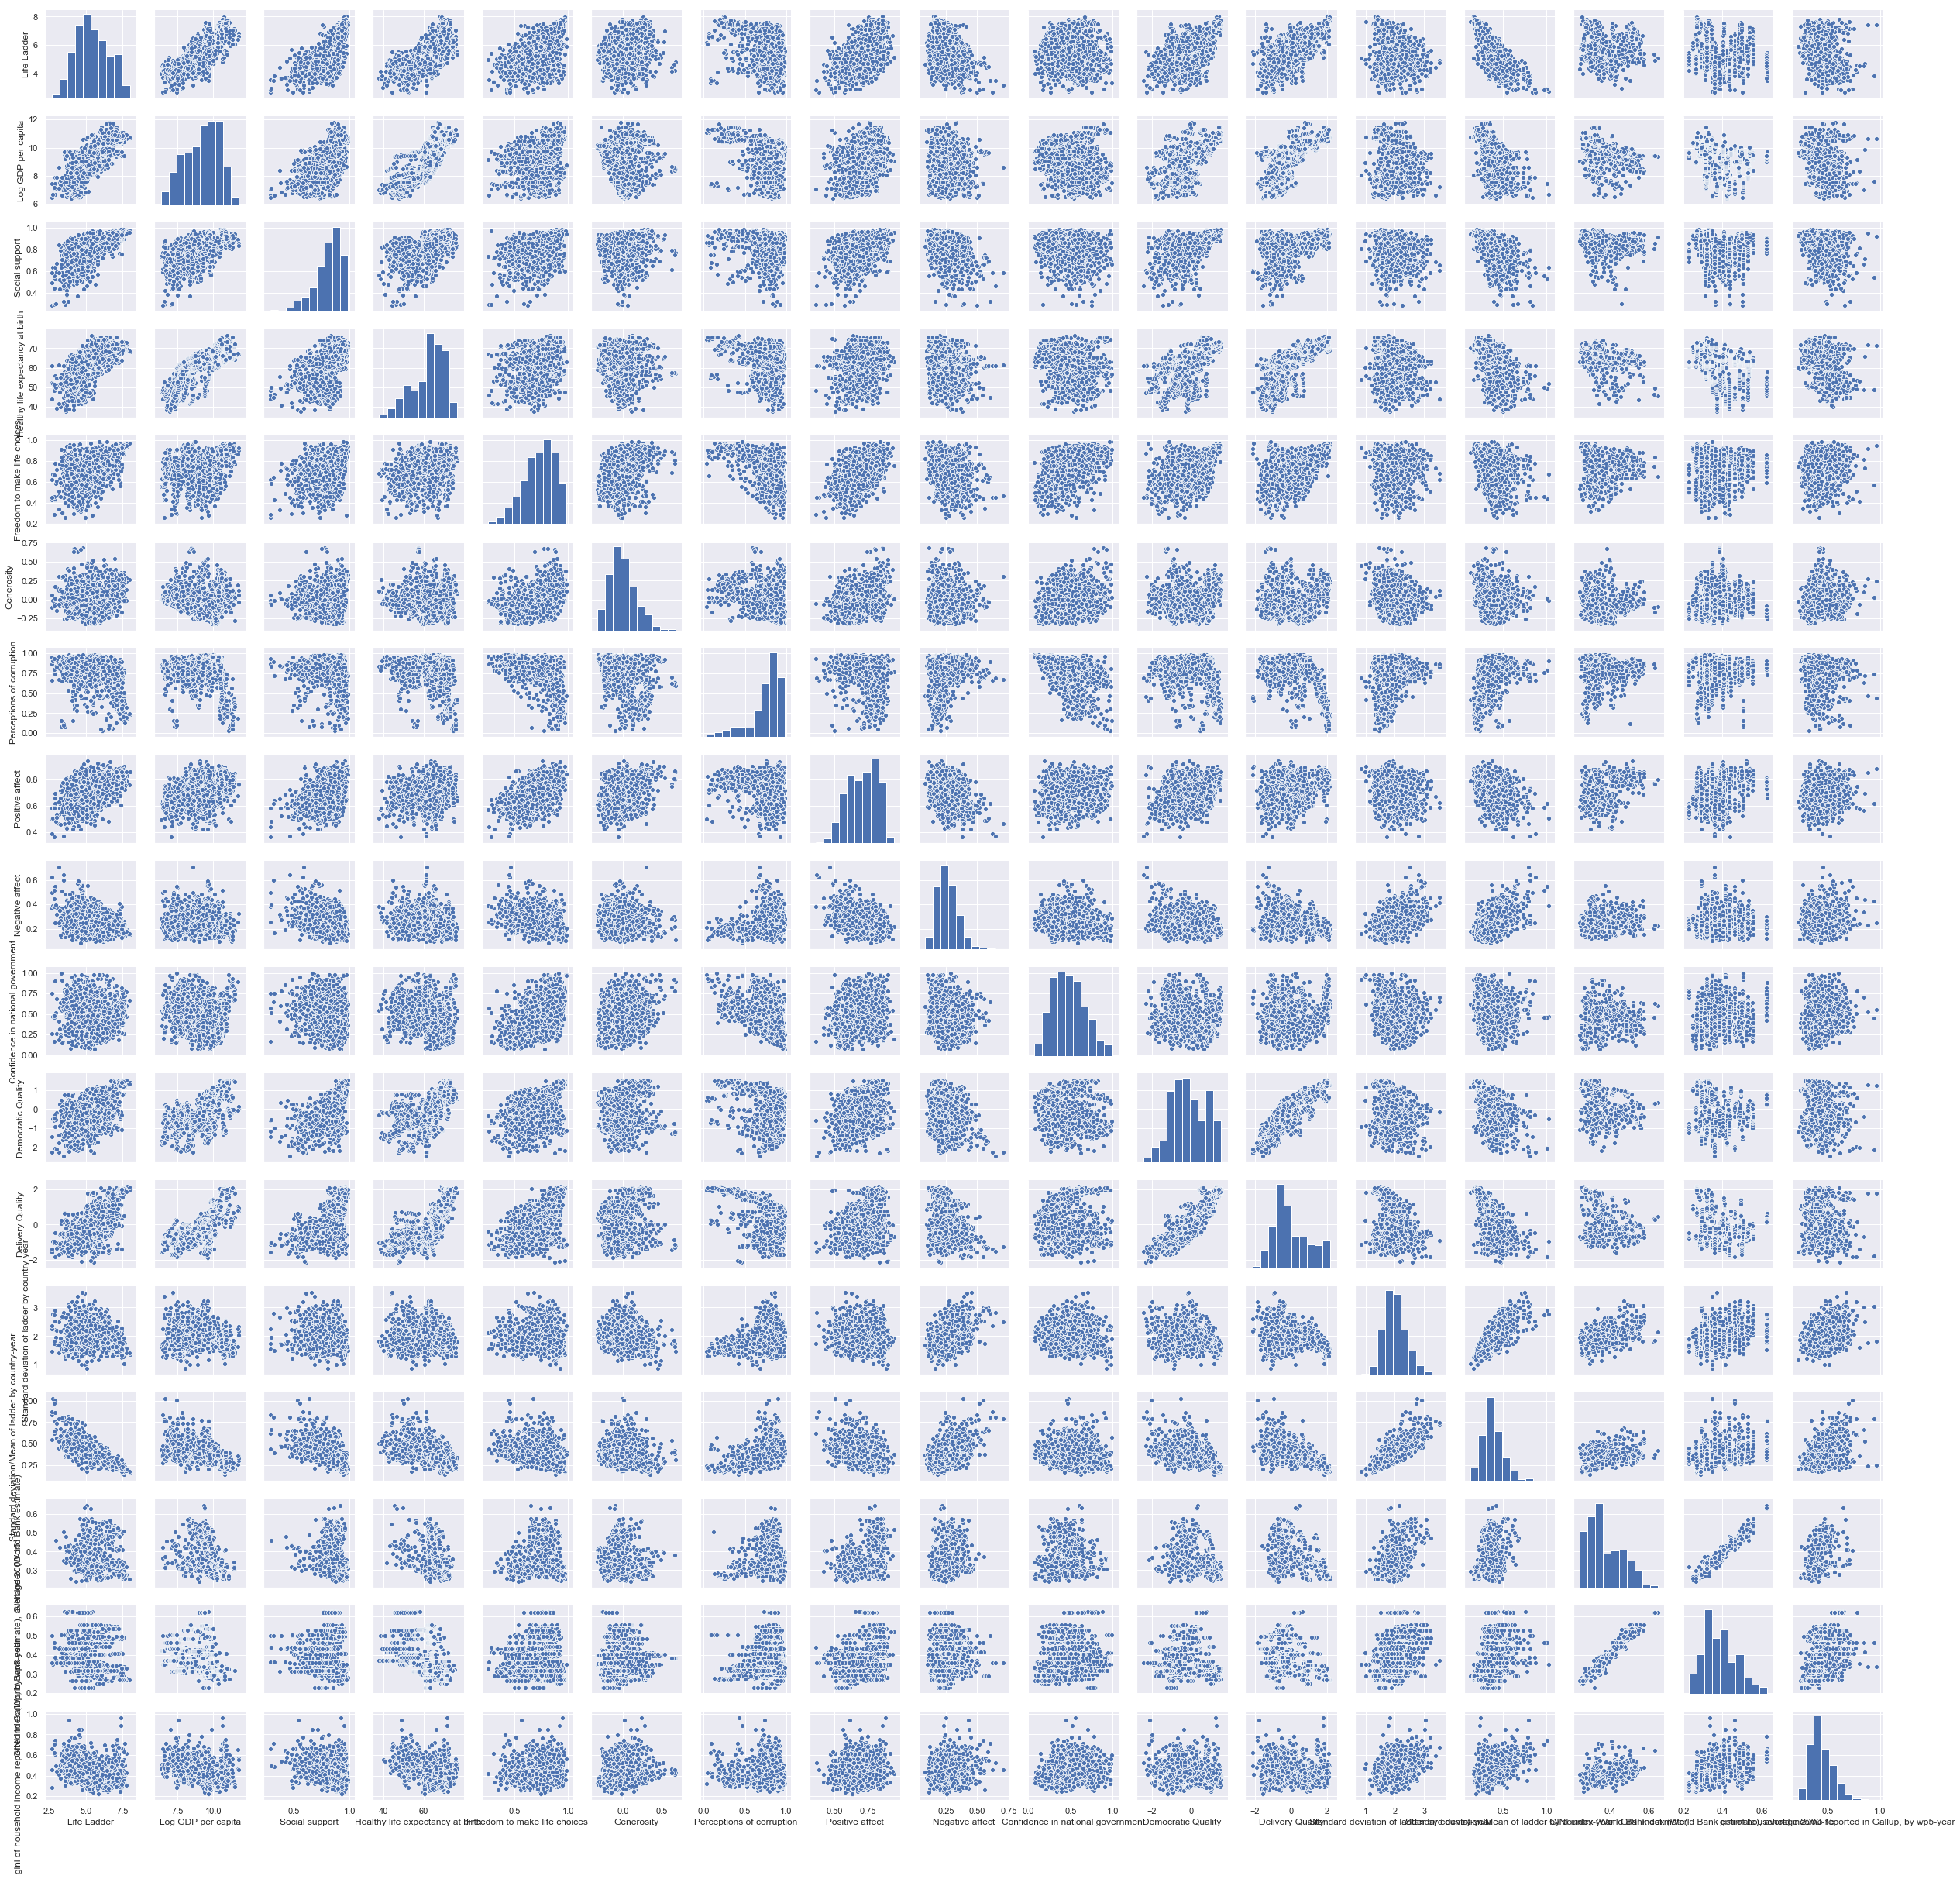

In [13]:
sb.pairplot(data = data_M.drop(['year'],axis=1))    #distribution of original data

E:\anaconda\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


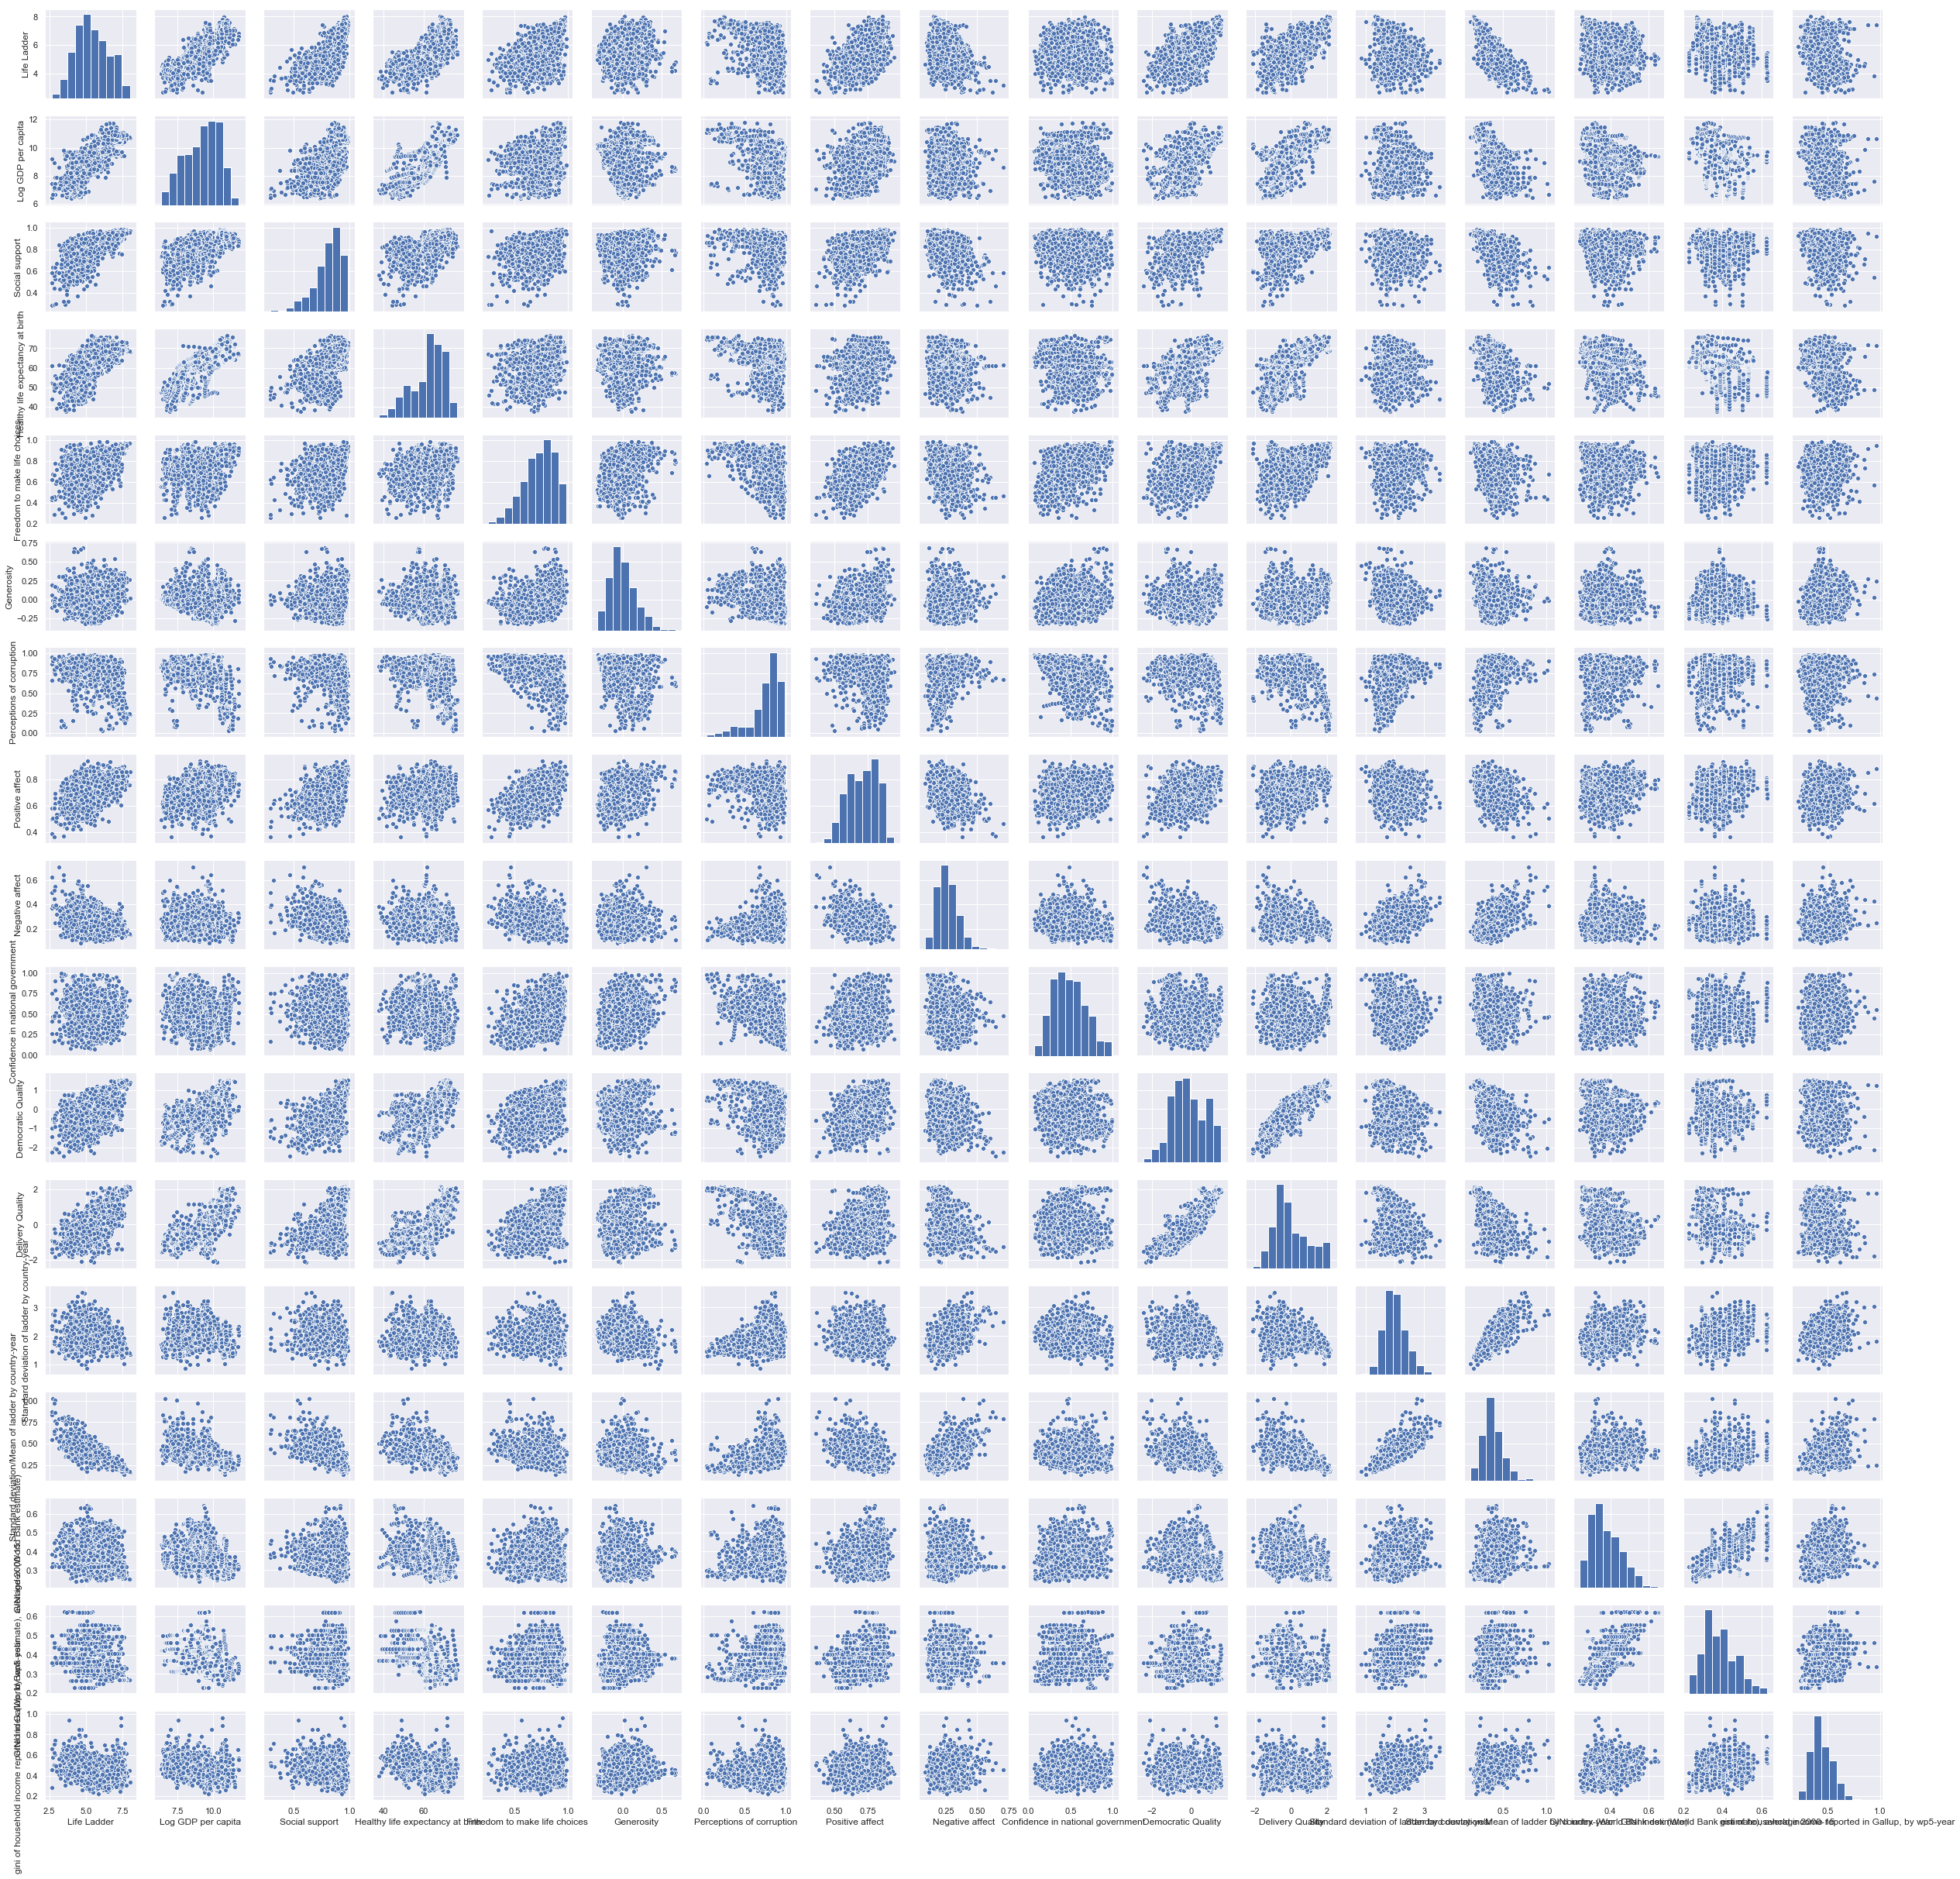

In [14]:
sb.pairplot(data = data_pred.drop(['year'],axis=1))    #distribution of filled in data, which should resemble that of the original data

In [15]:
data_complete = data_pred.dropna()
data_complete.head(1562)

country                    Region indicator  year  Life Ladder  \
14      Albania          Central and Eastern Europe  2012     5.510124   
15      Albania          Central and Eastern Europe  2013     4.550648   
16      Albania          Central and Eastern Europe  2014     4.813763   
17      Albania          Central and Eastern Europe  2015     4.606651   
18      Albania          Central and Eastern Europe  2016     4.511101   
19      Albania          Central and Eastern Europe  2017     4.639548   
20      Algeria        Middle East and North Africa  2010     5.463567   
21      Algeria        Middle East and North Africa  2011     5.317194   
22      Algeria        Middle East and North Africa  2012     5.604596   
23      Algeria        Middle East and North Africa  2014     6.354898   
24      Algeria        Middle East and North Africa  2016     5.340854   
25      Algeria        Middle East and North Africa  2017     5.248912   
26       Angola                  Sub-Saharan Africa  2011     5.589001   
27       Angola                  Sub-Saharan Africa  2012     4.360250   
28       Angola                  Sub-Saharan Africa  2013     3.937107   
29       Angola                  Sub-Saharan Africa  2014     3.794838   
30    Argentina         Latin America and Caribbean  2006     6.312925   
31    Argentina         Latin America and Caribbean  2007     6.073158   
32    Argentina         Latin America and Caribbean  2008     5.961034   
33    Argentina         Latin America and Caribbean  2009     6.424133   
34    Argentina         Latin America and Caribbean  2010     6.441067   
35    Argentina         Latin America and Caribbean  2011     6.775805   
36    Argentina         Latin America and Caribbean  2012     6.468387   
37    Argentina         Latin America and Caribbean  2013     6.582260   
38    Argentina         Latin America and Caribbean  2014     6.671114   
39    Argentina         Latin America and Caribbean  2015     6.697131   
40    Argentina         Latin America and Caribbean  2016     6.427221   
41    Argentina         Latin America and Caribbean  2017     6.039330   
42      Armenia  Commonwealth of Independent States  2006     4.289311   
43      Armenia  Commonwealth of Independent States  2007     4.881516   
...         ...                                 ...   ...          ...   
1532      Yemen        Middle East and North Africa  2011     3.746256   
1533      Yemen        Middle East and North Africa  2012     4.060601   
1534      Yemen        Middle East and North Africa  2013     4.217679   
1535      Yemen        Middle East and North Africa  2014     3.967958   
1536      Yemen        Middle East and North Africa  2015     2.982674   
1537      Yemen        Middle East and North Africa  2016     3.825631   
1538      Yemen        Middle East and North Africa  2017     3.253560   
1539     Zambia                  Sub-Saharan Africa  2006     4.824455   
1540     Zambia                  Sub-Saharan Africa  2007     3.998293   
1541     Zambia                  Sub-Saharan Africa  2008     4.730263   
1542     Zambia                  Sub-Saharan Africa  2009     5.260361   
1543     Zambia                  Sub-Saharan Africa  2011     4.999114   
1544     Zambia                  Sub-Saharan Africa  2012     5.013375   
1545     Zambia                  Sub-Saharan Africa  2013     5.243996   
1546     Zambia                  Sub-Saharan Africa  2014     4.345837   
1547     Zambia                  Sub-Saharan Africa  2015     4.843164   
1548     Zambia                  Sub-Saharan Africa  2016     4.347544   
1549     Zambia                  Sub-Saharan Africa  2017     3.932777   
1550   Zimbabwe                  Sub-Saharan Africa  2006     3.826268   
1551   Zimbabwe                  Sub-Saharan Africa  2007     3.280247   
1552   Zimbabwe                  Sub-Saharan Africa  2008     3.174264   
1553   Zimbabwe                  Sub-Saharan Africa  2009     4.055914   
1554   Zimba

In [16]:
data_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 14 to 1561
Data columns (total 20 columns):
country                                                     1548 non-null object
Region indicator                                            1548 non-null object
year                                                        1548 non-null int64
Life Ladder                                                 1548 non-null float64
Log GDP per capita                                          1548 non-null float64
Social support                                              1548 non-null float64
Healthy life expectancy at birth                            1548 non-null float64
Freedom to make life choices                                1548 non-null float64
Generosity                                                  1548 non-null float64
Perceptions of corruption                                   1548 non-null float64
Positive affect                                             1548 non-null fl

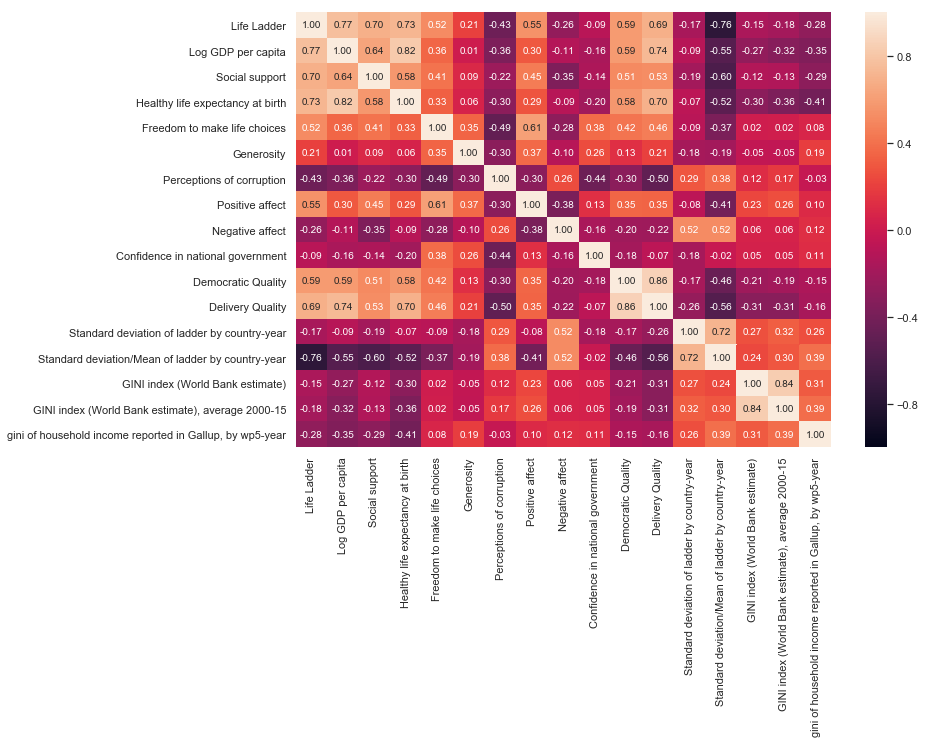

In [17]:
data_c = data_complete.drop(['year'],axis=1)
f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(data_c.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")    # look at the first column or first row to see which variable has the highest correlation coefficient with Life Ladder

# Building a regression model

## <font color='grey'>Preparation of train-test datasets</font>

In [18]:
data_comp = data_complete.drop(['GINI index (World Bank estimate)'],axis = 1)

<font color='red'>**_we are not going to use this column in building our model because the number data points given in the dataset was less than half of the number of the whole dataset and our model would be entirely based on our predicted values when we filled in the missing data points_**</font>

In [19]:
data_comp = data_comp.drop(['Standard deviation of ladder by country-year','Standard deviation/Mean of ladder by country-year'],axis = 1)

<font color='red'>**_we are not going to use these columns because they are directly related/calculated from life ladder, which is the variable that we are trying to predict_**</font>

In [20]:
data_comp1 = data_comp.drop(['year','country','Region indicator'],axis = 1).reset_index()

In [21]:
data_comp = data_comp1.drop(['index'],axis = 1)

<font color='red'>**_we are not going to use these columns because they are string variables/do not have a linear relationship with life ladder_**</font>

In [22]:
data_comp.head()

Life Ladder  Log GDP per capita  Social support  \
0     5.510124            9.246649        0.784502   
1     4.550648            9.258439        0.759477   
2     4.813763            9.278097        0.625587   
3     4.606651            9.303031        0.639356   
4     4.511101            9.337774        0.638411   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         68.028885                      0.601512   -0.174559   
1                         68.291374                      0.631830   -0.132977   
2                         68.512100                      0.734648   -0.030553   
3                         68.691956                      0.703851   -0.086883   
4                         68.871811                      0.729819   -0.023276   

   Perceptions of corruption  Positive affect  Negative affect  \
0                   0.847675         0.606636         0.271393   
1                   0.862905         0.633609         0.338379   
2                   0.882704         0.684911         0.334543   
3                   0.884793         0.688370         0.350427   
4                   0.901071         0.675244         0.321706   

   Confidence in national government  Democratic Quality  Delivery Quality  \
0                           0.364894           -0.060784         -0.328862   
1                           0.338095            0.070411         -0.330956   
2                           0.498786            0.314873         -0.187407   
3                           0.506978            0.251629         -0.152544   
4                           0.400910            0.208456         -0.139161   

   GINI index (World Bank estimate), average 2000-15  \
0                                            0.30325   
1                                            0.30325   
2                                            0.30325   
3                                            0.30325   
4                                            0.30325   

   gini of household income reported in Gallup, by wp5-year  
0                                           0.568153         
1                                           0.633796         
2                                           0.417219         
3                                           0.422627         
4                                           0.416540

In [23]:
y = pd.DataFrame(data_comp['Life Ladder'])
X = data_comp.drop(['Life Ladder'],axis = 1)    # drop life ladder becasue it is the variable we are trying to predict

## <font color='yellow'>Hold-out validation</font>

In [24]:
from sklearn.model_selection import train_test_split
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X, y, test_size = 0.2)

print("X_Train Set :", X_train_h.shape)
print("X_Test Set  :", X_test_h.shape)
print("y_Train Set :", y_train_h.shape)
print("y_Test Set  :", y_test_h.shape)

X_Train Set : (1238, 13)
X_Test Set  : (310, 13)
y_Train Set : (1238, 1)
y_Test Set  : (310, 1)


## <font color='yellow'>Cross-validation (K-fold)</font>

In [25]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=6)
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf)

KFold(n_splits=6, random_state=None, shuffle=False)


In [26]:
for train_index, test_index in kf.split(X,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

## <font color='grey'>Linear regression model</font>

In [27]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

### <font color='purple'> Using hold-out validation</font>

In [28]:
linreg.fit(X_train_h, y_train_h)
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()
pd.DataFrame(list(zip(X_train_h.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [-0.74167054]
Coefficients of Regression 	: a =  [[ 0.3064632   1.84968171  0.0177011   0.59225364  0.41162485 -0.87201739
   2.27879446  0.03694147 -0.60902353 -0.01022088  0.06122349  0.14780886
  -0.94487661]]



Predictors  Coefficients
0                                  Log GDP per capita      0.306463
1                                      Social support      1.849682
2                    Healthy life expectancy at birth      0.017701
3                        Freedom to make life choices      0.592254
4                                          Generosity      0.411625
5                           Perceptions of corruption     -0.872017
6                                     Positive affect      2.278794
7                                     Negative affect      0.036941
8                   Confidence in national government     -0.609024
9                                  Democratic Quality     -0.010221
10                                   Delivery Quality      0.061223
11  GINI index (World Bank estimate), average 2000-15      0.147809
12  gini of household income reported in Gallup, b...     -0.944877

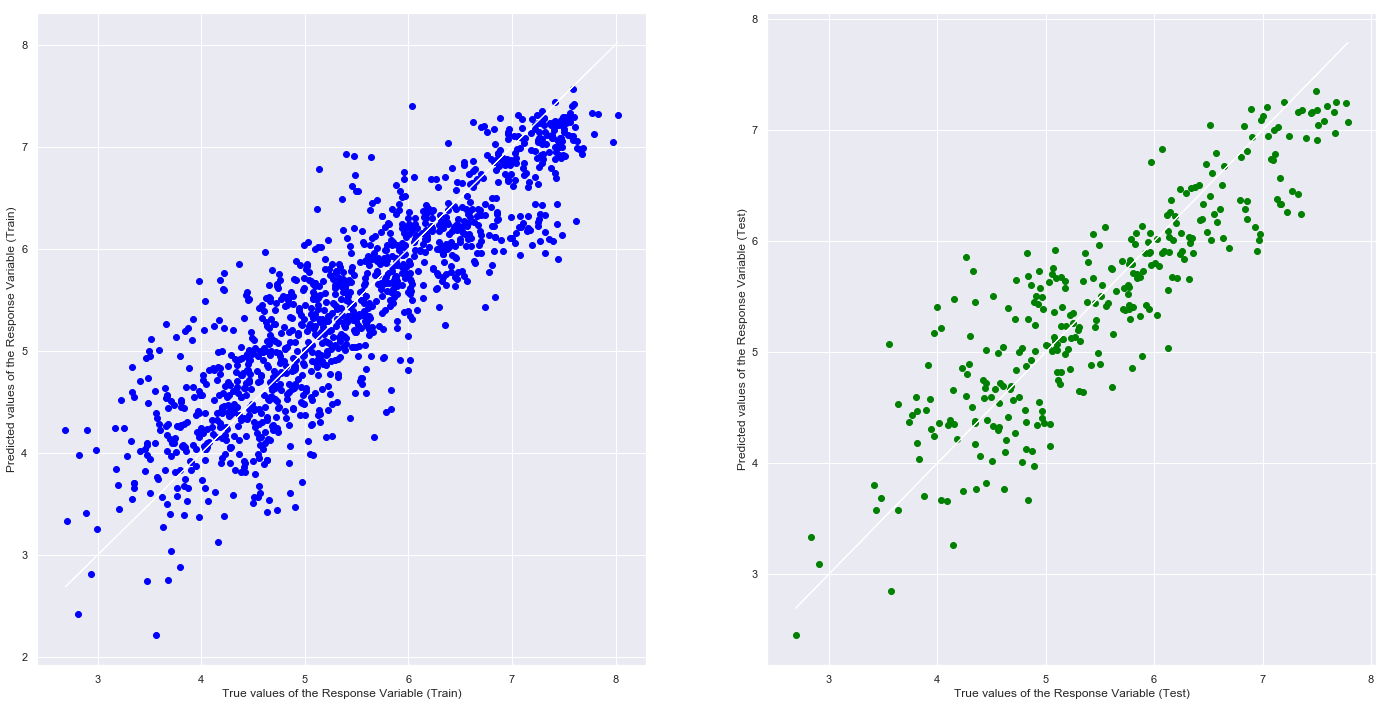

In [29]:
y_train_h_pred_L = linreg.predict(X_train_h)
y_test_h_pred_L = linreg.predict(X_test_h)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_h, y_train_h_pred_L, color = "blue")
axes[0].plot(y_train_h, y_train_h, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test_h, y_test_h_pred_L, color = "green")
axes[1].plot(y_test_h, y_test_h, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error
print("Goodness of Fit of Model \tTrain Dataset")
print("Score of model (R^2) \t:", linreg.score(X_train_h, y_train_h))
print("Error of prediction (MSE) \t:", mean_squared_error(y_train_h, y_train_h_pred_L))
print("Accuracy of prediction \t:", metrics.r2_score(y_train_h, y_train_h_pred_L))
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Score of model (R^2) \t:", linreg.score(X_test_h, y_test_h))
print("Erroe of prediction (MSE) \t:", mean_squared_error(y_test_h, y_test_h_pred_L))
print("Accuracy of prediction \t:", metrics.r2_score(y_test_h, y_test_h_pred_L))
print()

Goodness of Fit of Model 	Train Dataset
Score of model (R^2) 	: 0.7684582142354085
Error of prediction (MSE) 	: 0.29428881382858785
Accuracy of prediction 	: 0.7684582142354085

Goodness of Fit of Model 	Test Dataset
Score of model (R^2) 	: 0.7820445634124483
Erroe of prediction (MSE) 	: 0.2508226971436481
Accuracy of prediction 	: 0.7820445634124482



### <font color='purple'> Using cross validation</font>

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [34]:
linreg.fit(X_train_cv, y_train_cv)
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()
pd.DataFrame(list(zip(X_train_cv.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [-0.25421496]
Coefficients of Regression 	: a =  [[ 0.2737088   1.8542877   0.01531072  0.65399953  0.49728558 -0.91650723
   2.31759154  0.40639651 -0.84060987 -0.074592    0.13182488 -0.03475289
  -0.93262894]]



Predictors  Coefficients
0                                  Log GDP per capita      0.273709
1                                      Social support      1.854288
2                    Healthy life expectancy at birth      0.015311
3                        Freedom to make life choices      0.654000
4                                          Generosity      0.497286
5                           Perceptions of corruption     -0.916507
6                                     Positive affect      2.317592
7                                     Negative affect      0.406397
8                   Confidence in national government     -0.840610
9                                  Democratic Quality     -0.074592
10                                   Delivery Quality      0.131825
11  GINI index (World Bank estimate), average 2000-15     -0.034753
12  gini of household income reported in Gallup, b...     -0.932629

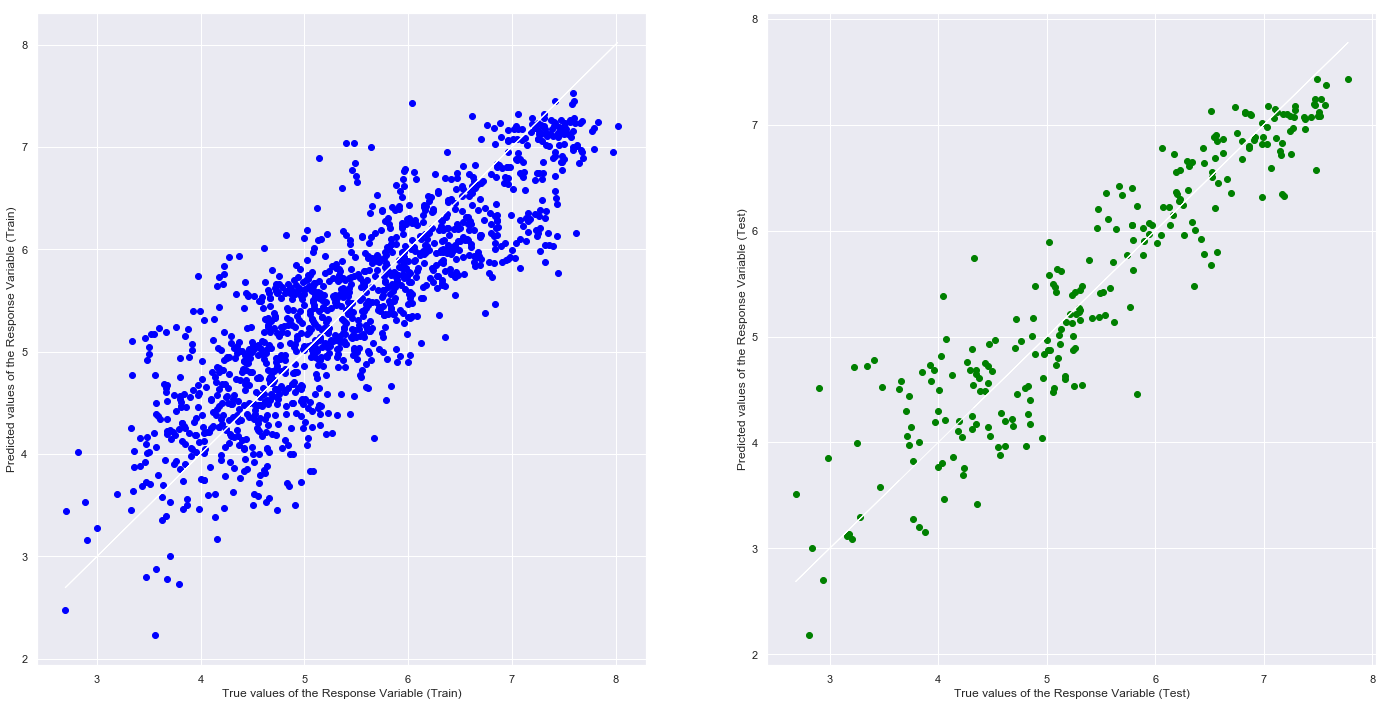

In [35]:
y_train_cv_pred_L = cross_val_predict(linreg, X_train_cv, y_train_cv, cv=6)
y_test_cv_pred_L = cross_val_predict(linreg, X_test_cv, y_test_cv, cv=6)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_cv, y_train_cv_pred_L, color = "blue")
axes[0].plot(y_train_cv, y_train_cv, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test_cv, y_test_cv_pred_L, color = "green")
axes[1].plot(y_test_cv, y_test_cv, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [36]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Score of model (R^2) \t:", cross_val_score(linreg, X_train_cv, y_train_cv, cv=6))
print("Error of prediction (MSE) \t:", mean_squared_error(y_train_cv, y_train_cv_pred_L))
print("Accuracy of prediction \t:", metrics.r2_score(y_train_cv, y_train_cv_pred_L))
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Score of model (R^2) \t:", cross_val_score(linreg, X_test_cv, y_test_cv, cv=6))
print("Erroe of prediction (MSE) \t:", mean_squared_error(y_test_cv, y_test_cv_pred_L))
print("Accuracy of prediction \t:", metrics.r2_score(y_test_cv, y_test_cv_pred_L))
print()

Goodness of Fit of Model 	Train Dataset
Score of model (R^2) 	: [0.74056308 0.7757414  0.74669541 0.74752378 0.69763753 0.51409182]
Error of prediction (MSE) 	: 0.33019819647975707
Accuracy of prediction 	: 0.7207542635088022

Goodness of Fit of Model 	Test Dataset
Score of model (R^2) 	: [0.90963887 0.66994543 0.70184776 0.90897297 0.60213427 0.56254875]
Erroe of prediction (MSE) 	: 0.22325402610434522
Accuracy of prediction 	: 0.8579234832351798



## <font color='grey'>Random forest regressor model</font>

In [45]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

### <font color='purple'> Using hold-out validation</font>

In [46]:
rfr.fit(X_train_h,y_train_h)

E:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

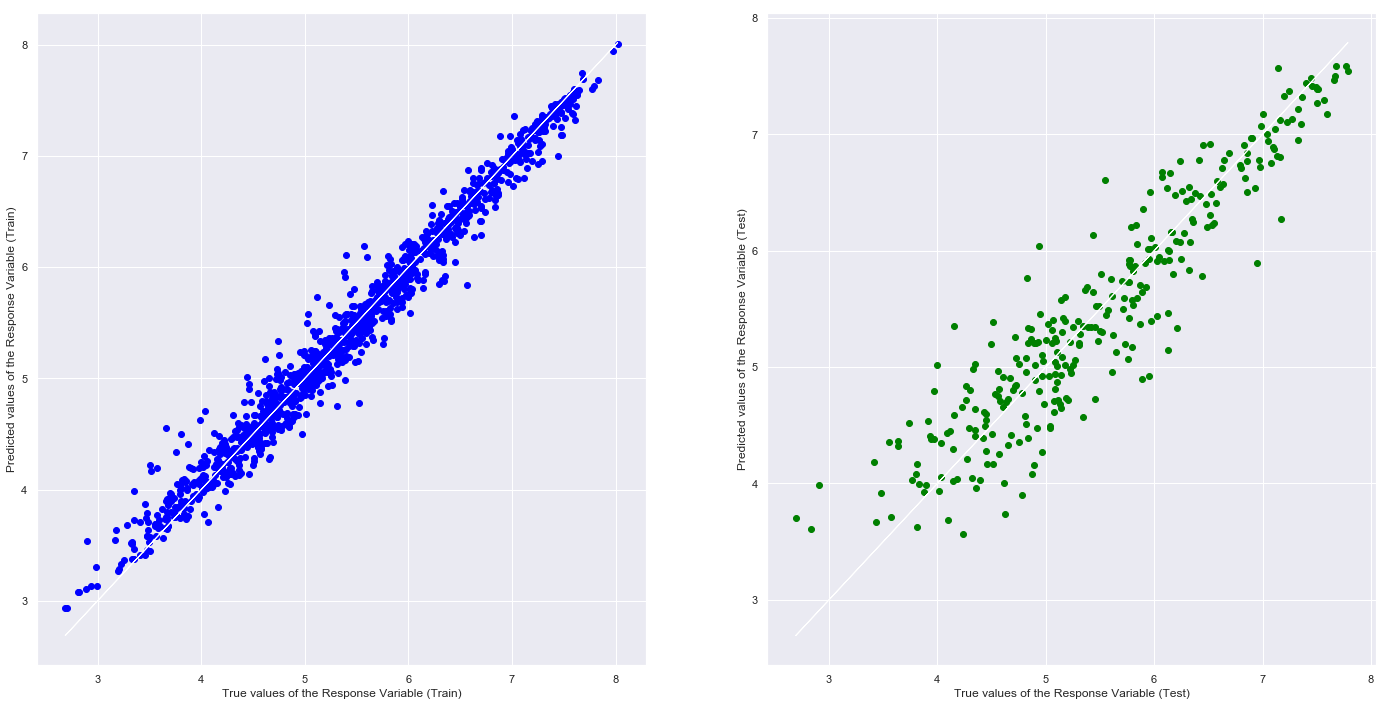

In [47]:
y_train_h_pred_R = rfr.predict(X_train_h)
y_test_h_pred_R = rfr.predict(X_test_h)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_h, y_train_h_pred_R, color = "blue")
axes[0].plot(y_train_h, y_train_h, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test_h, y_test_h_pred_R, color = "green")
axes[1].plot(y_test_h, y_test_h, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [48]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Score of the model (R^2) \t:", rfr.score(X_train_h, y_train_h))
print("Error of prediction (MSE) \t:", mean_squared_error(y_train_h, y_train_h_pred_R))
print("Accuracy of prediction:", metrics.r2_score(y_train_h, y_train_h_pred_R))
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Score of the model (R^2) \t:", rfr.score(X_test_h, y_test_h))
print("Error of prediction (MSE) \t:", mean_squared_error(y_test_h, y_test_h_pred_R))
print("Accuracy of prediction:", metrics.r2_score(y_test_h, y_test_h_pred_R))
print()

Goodness of Fit of Model 	Train Dataset
Score of the model (R^2) 	: 0.9771861685104084
Error of prediction (MSE) 	: 0.028996301405324644
Accuracy of prediction: 0.9771861685104084

Goodness of Fit of Model 	Test Dataset
Score of the model (R^2) 	: 0.866517392188124
Error of prediction (MSE) 	: 0.153611528289149
Accuracy of prediction: 0.866517392188124



### <font color='purple'> Using cross validation</font>

In [49]:
rfr.fit(X_train_cv,y_train_cv)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

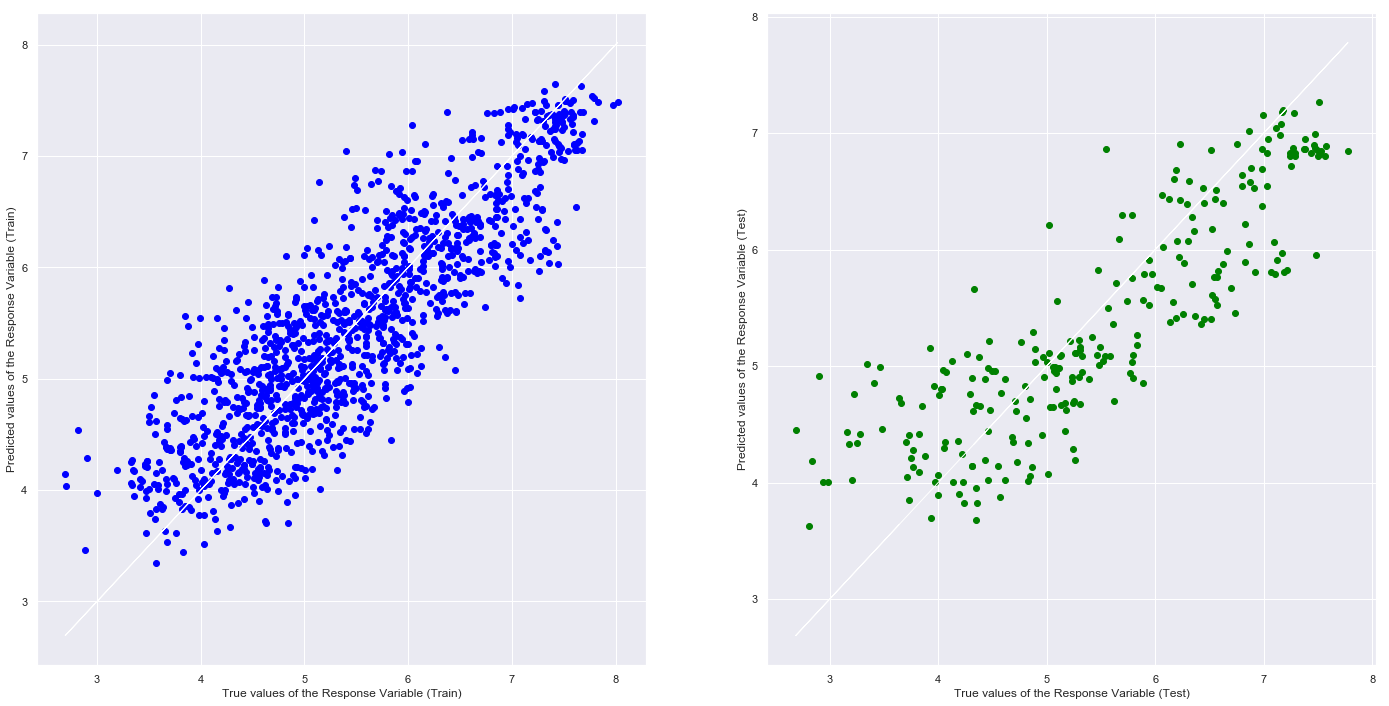

In [50]:
y_train_cv_pred_R = cross_val_predict(rfr, X_train_cv, y_train_cv, cv=6)
y_test_cv_pred_R = cross_val_predict(rfr, X_test_cv, y_test_cv, cv=6)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_cv, y_train_cv_pred_R, color = "blue")
axes[0].plot(y_train_cv, y_train_cv, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test_cv, y_test_cv_pred_R, color = "green")
axes[1].plot(y_test_cv, y_test_cv, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [51]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Score of model (R^2) \t:", cross_val_score(rfr, X_train_cv, y_train_cv, cv=6))
print("Error of prediction (MSE) \t:", mean_squared_error(y_train_cv, y_train_cv_pred_R))
print("Accuracy of prediction \t:", metrics.r2_score(y_train_cv, y_train_cv_pred_R))
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Score of model (R^2) \t:", cross_val_score(rfr, X_test_cv, y_test_cv, cv=6))
print("Erroe of prediction (MSE) \t:", mean_squared_error(y_test_cv, y_test_cv_pred_R))
print("Accuracy of prediction \t:", metrics.r2_score(y_test_cv, y_test_cv_pred_R))
print()

Goodness of Fit of Model 	Train Dataset


E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

Score of model (R^2) 	: [0.78034703 0.82833743 0.71653051 0.73130499 0.7208358  0.61194348]
Error of prediction (MSE) 	: 0.3016986991247637
Accuracy of prediction 	: 0.7448560399974934

Goodness of Fit of Model 	Test Dataset
Score of model (R^2) 	: [0.75873583 0.68294529 0.51540834 0.62945662 0.43463304 0.26216055]
Erroe of prediction (MSE) 	: 0.43272844003098365
Accuracy of prediction 	: 0.7246161668952766



E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


# Prediction of 2019 Life Ladder

In [52]:
data_2019 = pd.read_excel('WHR2019Chapter2OnlineData.xls',sheet_name = 'Table2.1')